### Importação dos dados



In [39]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



O que é um faturamento? É quanto a empresa recebeu (ou tem a receber) pelas vendas, antes de descontar despesas, impostos ou custos.

In [59]:
print('Quantidade\tQualidade\n5 amostras\tAlta\n3 amostras\tBaixa')






Quantidade	Qualidade
5 amostras	Alta
3 amostras	Baixa


## Faturamento Total

In [60]:
# Calculando faturamento total (soma da coluna Preço)

faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print("Faturamento Total por Loja:\n")
print(f"Loja 1: R$ {faturamento_loja1:,.2f}")
print(f"Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Loja 4: R$ {faturamento_loja4:,.2f}")


Faturamento Total por Loja:

Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


In [61]:
faturamentos = {
    'Loja 1': faturamento_loja1,
    'Loja 2': faturamento_loja2,
    'Loja 3': faturamento_loja3,
    'Loja 4': faturamento_loja4
}

faturamentos


{'Loja 1': np.float64(1534509.12),
 'Loja 2': np.float64(1488459.06),
 'Loja 3': np.float64(1464025.03),
 'Loja 4': np.float64(1384497.58)}

In [68]:
min_valor = min(valores)
max_valor = max(valores)

print(min_valor, max_valor)


1384497.58 1534509.12


## Gráfico do faturamento

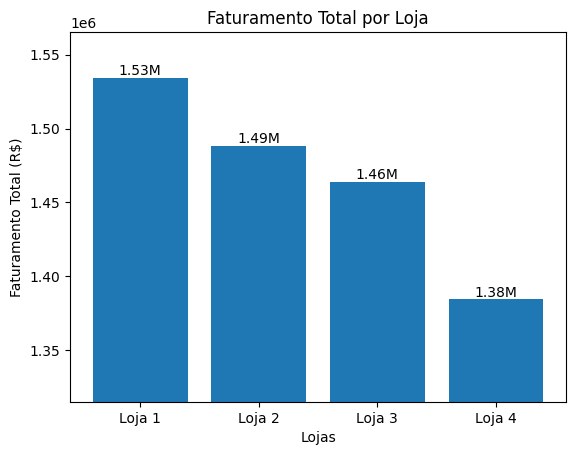

In [70]:
plt.figure()
barras = plt.bar(nomes_lojas, valores)

plt.title('Faturamento Total por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento Total (R$)')

# Ajustando escala do eixo Y
plt.ylim(min_valor * 0.95, max_valor * 1.02)

# Adicionando valores acima das barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2,
             altura,
             f'{altura/1_000_000:.2f}M',
             ha='center', va='bottom')

plt.show()








Conclusão 1 — Faturamento:

A Loja 1 possui o maior faturamento

A Loja 4 possui o menor faturamento

A diferença é perceptível mesmo com valores relativamente próximos

A Loja 4 já surge como candidata potencial à venda

# 2. Vendas por Categoria

In [45]:
# Loja 1
categoria_loja1 = loja['Categoria do Produto'].value_counts()

# Loja 2
categoria_loja2 = loja2['Categoria do Produto'].value_counts()

# Loja 3
categoria_loja3 = loja3['Categoria do Produto'].value_counts()

# Loja 4
categoria_loja4 = loja4['Categoria do Produto'].value_counts()

print("Loja 1:\n", categoria_loja1.head(), "\n")
print("Loja 2:\n", categoria_loja2.head(), "\n")
print("Loja 3:\n", categoria_loja3.head(), "\n")
print("Loja 4:\n", categoria_loja4.head())



Loja 1:
 Categoria do Produto
moveis              465
eletronicos         448
brinquedos          324
eletrodomesticos    312
esporte e lazer     284
Name: count, dtype: int64 

Loja 2:
 Categoria do Produto
moveis              442
eletronicos         422
brinquedos          313
eletrodomesticos    305
esporte e lazer     275
Name: count, dtype: int64 

Loja 3:
 Categoria do Produto
moveis              499
eletronicos         451
brinquedos          315
eletrodomesticos    278
esporte e lazer     277
Name: count, dtype: int64 

Loja 4:
 Categoria do Produto
moveis              480
eletronicos         451
brinquedos          338
esporte e lazer     277
eletrodomesticos    254
Name: count, dtype: int64


In [46]:
minimo = min(
    categoria_loja1.min(),
    categoria_loja2.min(),
    categoria_loja3.min(),
    categoria_loja4.min()
)

maximo = max(
    categoria_loja1.max(),
    categoria_loja2.max(),
    categoria_loja3.max(),
    categoria_loja4.max()
)

print(minimo, maximo)


170 499


## Gráfico de categorias para todas as Lojas

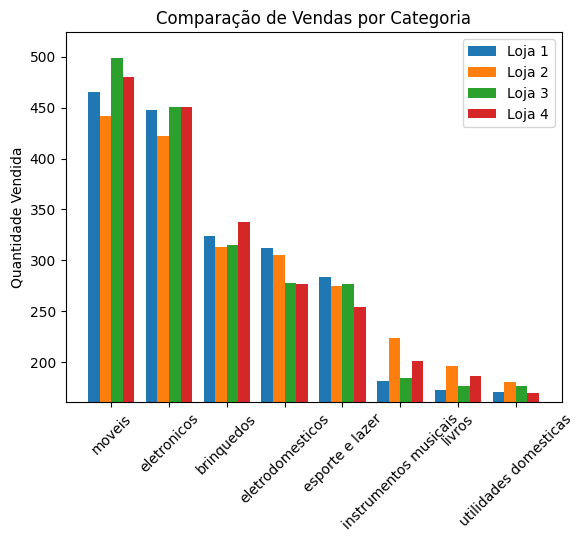

In [47]:
import matplotlib.pyplot as plt
import numpy as np

categorias = categoria_loja1.index
x = np.arange(len(categorias))
largura = 0.2

plt.figure()

plt.bar(x - 1.5*largura, categoria_loja1.values, largura, label='Loja 1')
plt.bar(x - 0.5*largura, categoria_loja2.values, largura, label='Loja 2')
plt.bar(x + 0.5*largura, categoria_loja3.values, largura, label='Loja 3')
plt.bar(x + 1.5*largura, categoria_loja4.values, largura, label='Loja 4')

plt.xticks(x, categorias, rotation=45)

# Ajustando eixo Y sem começar em zero
plt.ylim(minimo * 0.95, maximo * 1.05)

plt.title('Comparação de Vendas por Categoria')
plt.ylabel('Quantidade Vendida')
plt.legend()

plt.show()






In [72]:
import pandas as pd

lojas_todas = pd.concat([loja, loja2, loja3, loja4])


In [73]:
faturamento_categoria = lojas_todas.groupby('Categoria do Produto')['Preço'].sum()


## Gráfico faturamento por Categoria

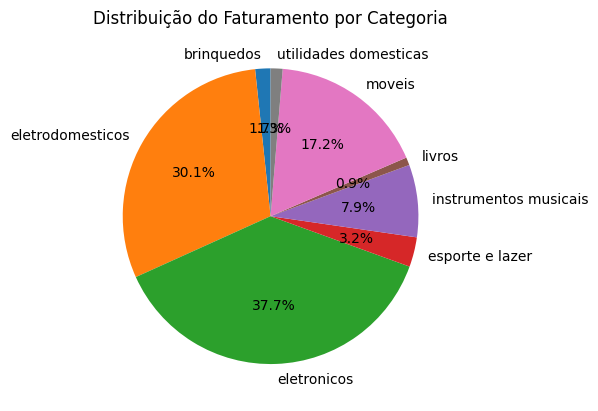

In [74]:
import matplotlib.pyplot as plt

plt.figure()

plt.pie(
    faturamento_categoria.values,
    labels=faturamento_categoria.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Distribuição do Faturamento por Categoria')
plt.show()


Análise Comparativa das Categorias: Agora focando na loja 4 ja que foi a que teve menos faturamento:

1º lugar em Brinquedos

2º lugar em Móveis

Empate em Eletrônicos com a loja 3 no primeiro lugar

Último em Eletrodomésticos

Último em Esporte e Lazer
2º em Livros / Instrumentos Musicais

Último (empatado com Loja 1) em Utilidades Domésticas

Importante:
A Loja 4 não é fraca em volume geral e em algumas categorias é até competitiva. Mas perde desempenho em categorias importantes como: Eletrodomésticos; Esporte e Lazer



# 3. Média de Avaliação das Lojas


In [48]:
# Média de avaliação por loja

media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

print("Média de Avaliação por Loja:\n")
print(f"Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Loja 4: {media_avaliacao_loja4:.2f}")


Média de Avaliação por Loja:

Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


## Gráfico das Avaliações

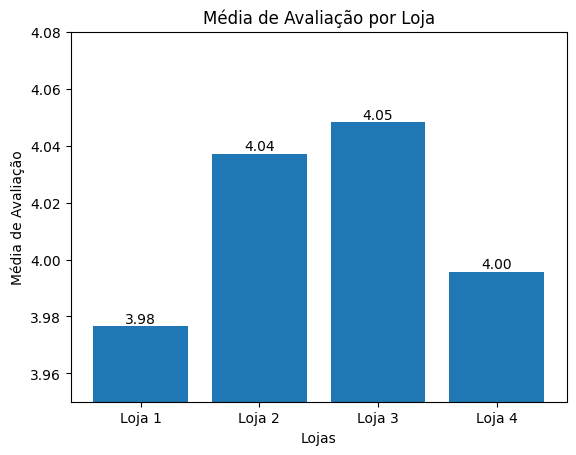

In [49]:
import matplotlib.pyplot as plt

avaliacoes = {
    'Loja 1': media_avaliacao_loja1,
    'Loja 2': media_avaliacao_loja2,
    'Loja 3': media_avaliacao_loja3,
    'Loja 4': media_avaliacao_loja4
}

nomes = list(avaliacoes.keys())
valores = list(avaliacoes.values())

plt.figure()
barras = plt.bar(nomes, valores)

plt.title('Média de Avaliação por Loja')
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliação')

# Ajustando escala para destacar diferenças
plt.ylim(3.95, 4.08)

# Adicionando valores nas colunas
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2,
             altura,
             f'{altura:.2f}',
             ha='center', va='bottom')

plt.show()


Análise Comparativa – Média de Avaliação das Lojas

A análise das médias de avaliação demonstra que todas as lojas apresentam desempenho muito semelhante em termos de satisfação dos clientes, com notas próximas a 4.0.

A Loja 3 possui a maior média de avaliação (4.05), seguida pela Loja 2 (4.04). A Loja 4 apresenta média 4.00, enquanto a Loja 1 possui a menor média (3.98). No entanto, as diferenças entre as notas são mínimas e não indicam variações significativas na experiência do cliente.

Dessa forma, pode-se concluir que a satisfação dos clientes é consistente entre as quatro lojas, não sendo essa métrica, isoladamente, um fator decisivo para a escolha da loja a ser vendida.


# 4. Produtos Mais e Menos Vendidos

In [50]:
# Produto mais vendido por loja

mais_vendido_loja1 = loja['Produto'].value_counts().idxmax()
mais_vendido_loja2 = loja2['Produto'].value_counts().idxmax()
mais_vendido_loja3 = loja3['Produto'].value_counts().idxmax()
mais_vendido_loja4 = loja4['Produto'].value_counts().idxmax()

print("Produto mais vendido por loja:\n")
print("Loja 1:", mais_vendido_loja1)
print("Loja 2:", mais_vendido_loja2)
print("Loja 3:", mais_vendido_loja3)
print("Loja 4:", mais_vendido_loja4)


Produto mais vendido por loja:

Loja 1: Micro-ondas
Loja 2: Iniciando em programação
Loja 3: Kit banquetas
Loja 4: Cama box


In [51]:
# Produto menos vendido por loja

menos_vendido_loja1 = loja['Produto'].value_counts().idxmin()
menos_vendido_loja2 = loja2['Produto'].value_counts().idxmin()
menos_vendido_loja3 = loja3['Produto'].value_counts().idxmin()
menos_vendido_loja4 = loja4['Produto'].value_counts().idxmin()

print("\nProduto menos vendido por loja:\n")
print("Loja 1:", menos_vendido_loja1)
print("Loja 2:", menos_vendido_loja2)
print("Loja 3:", menos_vendido_loja3)
print("Loja 4:", menos_vendido_loja4)



Produto menos vendido por loja:

Loja 1: Headset
Loja 2: Jogo de tabuleiro
Loja 3: Blocos de montar
Loja 4: Guitarra


In [52]:
# Pegando produto mais vendido e quantidade

top1_loja1 = loja['Produto'].value_counts().iloc[0]
top1_loja2 = loja2['Produto'].value_counts().iloc[0]
top1_loja3 = loja3['Produto'].value_counts().iloc[0]
top1_loja4 = loja4['Produto'].value_counts().iloc[0]

produtos_top = [
    mais_vendido_loja1,
    mais_vendido_loja2,
    mais_vendido_loja3,
    mais_vendido_loja4
]

quantidades_top = [
    top1_loja1,
    top1_loja2,
    top1_loja3,
    top1_loja4
]

print(produtos_top)
print(quantidades_top)


['Micro-ondas', 'Iniciando em programação', 'Kit banquetas', 'Cama box']
[np.int64(60), np.int64(65), np.int64(57), np.int64(62)]


## Gráfico dos produtos Mais e Menos Vendidos

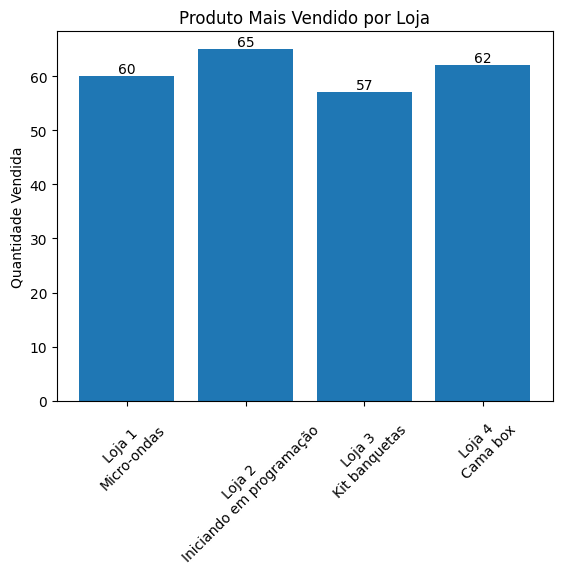

In [53]:
import matplotlib.pyplot as plt

labels = [
    f"Loja 1\n{mais_vendido_loja1}",
    f"Loja 2\n{mais_vendido_loja2}",
    f"Loja 3\n{mais_vendido_loja3}",
    f"Loja 4\n{mais_vendido_loja4}"
]

plt.figure()
barras = plt.bar(labels, quantidades_top)

plt.title('Produto Mais Vendido por Loja')
plt.ylabel('Quantidade Vendida')

plt.xticks(rotation=45)

# Adicionando valores nas barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2,
             altura,
             f'{int(altura)}',
             ha='center', va='bottom')

plt.show()




Observa-se que cada loja possui um produto com forte concentração de vendas, indicando perfis de consumo distintos entre as unidades.

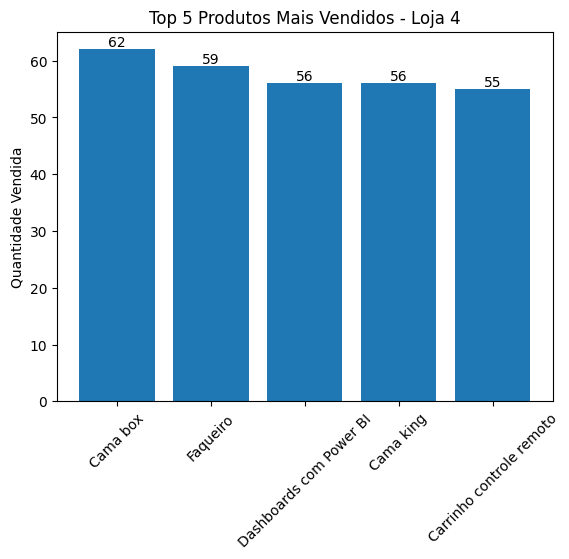

In [54]:
top5_loja4 = loja4['Produto'].value_counts().head(5)

plt.figure()
barras = plt.bar(top5_loja4.index, top5_loja4.values)

plt.title('Top 5 Produtos Mais Vendidos - Loja 4')
plt.ylabel('Quantidade Vendida')

plt.xticks(rotation=45)

for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2,
             altura,
             f'{int(altura)}',
             ha='center', va='bottom')

plt.show()


Análise – Loja 4

O gráfico demonstra forte concentração de vendas no produto Cama box, indicando que ele é o principal motor de volume da loja. Há oportunidade de expansão nos demais produtos do Top 5 para reduzir dependência de um único item.

# 5. Frete Médio por Loja

In [55]:
loja.columns


Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

In [56]:
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

fretes_medios = [
    frete_medio_loja1,
    frete_medio_loja2,
    frete_medio_loja3,
    frete_medio_loja4
]


In [57]:
print(f"Frete médio Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Frete médio Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Frete médio Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Frete médio Loja 4: R$ {frete_medio_loja4:.2f}")


Frete médio Loja 1: R$ 34.69
Frete médio Loja 2: R$ 33.62
Frete médio Loja 3: R$ 33.07
Frete médio Loja 4: R$ 31.28


## Gráfico Frete Médio

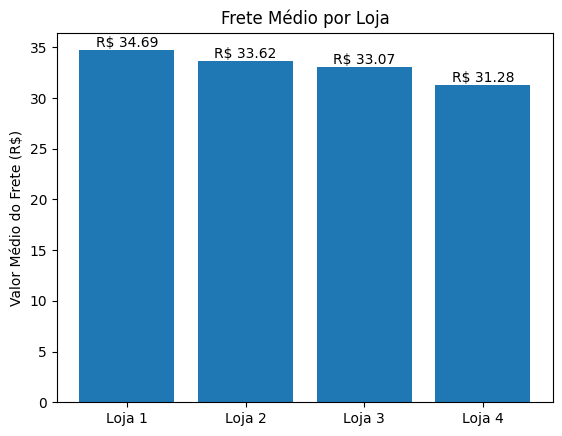

In [58]:
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.figure()
barras = plt.bar(lojas, fretes_medios)

plt.title('Frete Médio por Loja')
plt.ylabel('Valor Médio do Frete (R$)')

for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2,
             altura,
             f'R$ {altura:.2f}',
             ha='center', va='bottom')

plt.show()


Análise – Frete Médio por Loja

Observa-se que a Loja 4 apresenta o menor frete médio (R$ 31,28), indicando maior eficiência logística ou estratégia mais competitiva de entrega.

A Loja 1 possui o maior frete médio (R$ 34,69), o que pode impactar negativamente a decisão de compra, especialmente em produtos de menor valor agregado.

Apesar das diferenças não serem extremamente elevadas, a variação pode influenciar a percepção de custo-benefício pelos clientes.

## **Relatório**

ANÁLISE DE DESEMPENHO DAS LOJAS

## Faturamento

A análise do faturamento demonstrou que:

A Loja 4 apresentou o menor faturamento entre as quatro unidades. As demais lojas superaram a Loja 4 em geração de receita.

Este é o principal indicador da decisão, pois representa a contribuição financeira direta da unidade para o negócio.







## Produtos Mais Vendidos

Cada loja possui um produto com forte concentração de vendas:

Loja 1: Micro-ondas

Loja 2: Iniciando em Programação

Loja 3: Kit Banquetas

Loja 4: Cama Box

Observa-se que a Loja 4 possui um produto líder relevante (Cama Box), porém essa concentração não foi suficiente para elevar seu faturamento ao nível das demais unidades.

Isso indica possível dependência de um único item e menor diversificação estratégica.

## Frete Médio

Loja 1 → R$ 34,69

Loja 2 → R$ 33,62

Loja 3 → R$ 33,07

Loja 4 → R$ 31,28

A Loja 4 apresenta o menor frete médio, demonstrando eficiência logística e maior competitividade na entrega.

Entretanto, essa vantagem operacional não se converteu em maior faturamento.

## Avaliação Estratégica Integrada

Ao cruzar os indicadores, observa-se que:

A Loja 4 possui boa eficiência operacional (frete competitivo).

Apresenta produto forte com boa saída. Porém, registra o menor faturamento geral.Demonstra menor impacto financeiro no conjunto das operações. Isso sugere que, apesar de possuir pontos positivos operacionais, sua performance financeira é inferior às demais unidades.



## Recomendação Final

Com base na análise dos dados apresentados, recomenda-se a venda da Loja 4.

É a unidade com menor faturamento total.

Sua eficiência logística não compensa o baixo retorno financeiro.

A concentração de vendas em poucos produtos pode indicar limitação de portfólio.

A venda permitiria realocação de recursos para unidades mais rentáveis.



## Conclusão Geral

A decisão é fundamentada em indicadores quantitativos objetivos, priorizando desempenho financeiro como principal critério estratégico.

A análise demonstra coerência entre dados, visualizações e recomendação final, evidenciando uma tomada de decisão orientada por dados (data-driven decision making).
